In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline

## get data from yajoo.finance

In [5]:
gld = pdr.get_data_yahoo('GLD', '2016-11-08')
gld.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-11-08,123.089996,121.360001,122.120003,121.639999,9480600,121.639999
2016-11-09,124.349998,121.110001,124.300003,121.559998,18236500,121.559998
2016-11-10,121.540001,119.379997,121.519997,119.750000,22268000,119.750000
2016-11-11,119.690002,116.230003,119.650002,117.099998,20381800,117.099998
2016-11-14,117.139999,115.489998,116.120003,116.110001,20729400,116.110001


## discard unneeded data


In [7]:
gld_close = pd.DataFrame(gld.Close)
gld_close.head()

,Close
Date,
2016-11-08,121.639999
2016-11-09,121.559998
2016-11-10,119.750000
2016-11-11,117.099998
2016-11-14,116.110001


In [11]:
gld_close['MA_9'] = gld_close.Close.rolling(9).mean() # shift
gld_close['MA_21'] = gld_close.Close.rolling(21).mean()
gld_close.head(10)

,Close,MA_9,MA_21
Date,,,
2016-11-08,121.639999,NaN,NaN
2016-11-09,121.559998,NaN,NaN
2016-11-10,119.750000,NaN,NaN
2016-11-11,117.099998,NaN,NaN
2016-11-14,116.110001,NaN,NaN
2016-11-15,117.120003,NaN,NaN
2016-11-16,116.769997,NaN,NaN
2016-11-17,116.169998,NaN,NaN
2016-11-18,115.150002,117.929999,NaN


# Plot data and moving averages

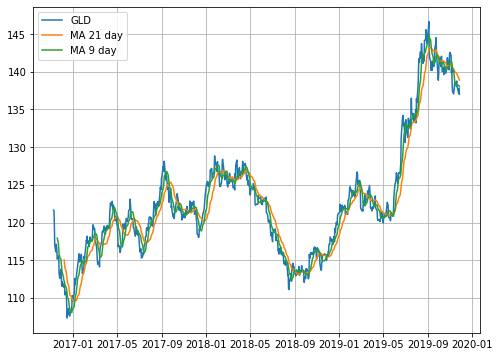

In [13]:
plt.figure(figsize = (8, 6))
plt.grid(True)
plt.plot(gld_close.Close, label = 'GLD')
plt.plot(gld_close.MA_21, label = 'MA 21 day')
plt.plot(gld_close.MA_9, label = 'MA 9 day')
plt.legend(loc = 2)

## compute log change

In [14]:
gld_close['change'] = np.log(gld_close['Close'])/gld_close['Close'].shift()

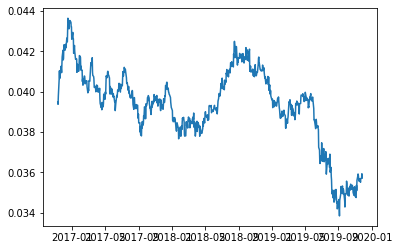

In [15]:
plt.plot(gld_close.change)

## computing rolling historical volatility, using .shift() method

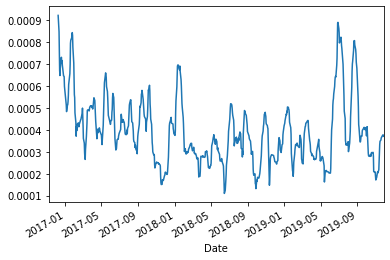

In [17]:
gld_close['Volatility'] = gld_close.change.rolling(21).std().shift()
gld_close['Volatility'].plot()

In [20]:
gld_close.head(10)

,Close,MA_9,MA_21,change,Volatility
Date,,,,,
2016-11-08,121.639999,NaN,NaN,NaN,NaN
2016-11-09,121.559998,NaN,NaN,0.039464,NaN
2016-11-10,119.750000,NaN,NaN,0.039367,NaN
2016-11-11,117.099998,NaN,NaN,0.039775,NaN
2016-11-14,116.110001,NaN,NaN,0.040602,NaN
2016-11-15,117.120003,NaN,NaN,0.041023,NaN
2016-11-16,116.769997,NaN,NaN,0.040644,NaN
2016-11-17,116.169998,NaN,NaN,0.040722,NaN
2016-11-18,115.150002,117.929999,NaN,0.040856,NaN


In [21]:
gld_close.MA_9 > gld_close.MA_21?

Type:        Series
String form:
Date
           2016-11-08           NaN
           2016-11-09           NaN
           2016-11-10           NaN
           2016-11-11        <...> 197142
           2019-11-26    139.059047
           2019-11-27    138.905238
           Name: MA_21, Length: 769, dtype: float64
Length:      769
File:        //anaconda3/lib/python3.7/site-packages/pandas/core/series.py
Docstring:  
One-dimensional ndarray with axis labels (including time series).

Labels need not be unique but must be a hashable type. The object
supports both integer- and label-based indexing and provides a host of
methods for performing operations involving the index. Statistical
methods from ndarray have been overridden to automatically exclude
missing data (currently represented as NaN).

Operations between Series (+, -, /, *, **) align values based on their
associated index values-- they need not be the same length. The result
index will be the sorted union of the two indexes.

Param

In [59]:
sele = gld_close[gld_close.MA_9 > gld_close.MA_21].index
for day in sele:
    print(day.date())